In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import normalize

## Loading dataset and unpack it into training and test samples

In [3]:
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Digits visualisation

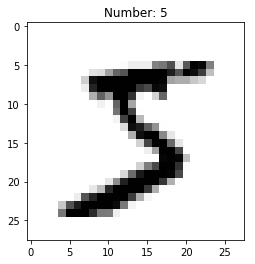

In [4]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title('Number: {}'.format(y_train[0]))
plt.show()

## Data normalization 

In [5]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)
# normalize values to be from 0 to 1 instead of beeing from 0 to 255
# It's easier to train deep learning model that way.

## Create a model

In [6]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

Instructions for updating:
Colocations handled automatically by placer.


## Trainig a model

In [7]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2581 - acc: 0.9236
Epoch 2/3
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1013 - acc: 0.9690
Epoch 3/3
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0697 - acc: 0.9776


## Validation model

In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0917 - acc: 0.9711
0.09170564103554935 0.9711
